In [99]:
# IMPORTANDO LIBRERIAS

import tensorflow_datasets as tfds
import math
import tensorflow as tf

In [100]:
# Cargando nuestro dataset
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

In [101]:
# Funcion para normalizar nuestro dataset
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255 #Aqui lo pasa de 0-255 a 0-1
  return images, labels

In [102]:
# Dividimos nuestro dataset
train, test = data['train'], data['test']

In [103]:
# Guardamos los valores posibles de clasificacion
labels = metadata.features['label'].names

In [104]:
#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
train = train.map(normalize)
test = test.map(normalize)

In [105]:
# Cargamos a memoria para mas rapidez de entrenamiento
train = train.cache()
test = test.cache()

In [106]:
# Creamos el modelo
model = tf.keras.Sequential([

    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu' ),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

In [107]:
# Compilamos el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [108]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
train_size = metadata.splits["train"].num_examples
test_size = metadata.splits["test"].num_examples

#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
BATCH_SIZE = 32

In [109]:
#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
train = train.repeat().shuffle(train_size).batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

In [110]:
%time history = model.fit(train, epochs=5, validation_data=test, steps_per_epoch= math.ceil(train_size/BATCH_SIZE), verbose=1 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9018 - loss: 0.3155 - val_accuracy: 0.9765 - val_loss: 0.0794
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9615 - loss: 0.1279 - val_accuracy: 0.9818 - val_loss: 0.0615
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9720 - loss: 0.0945 - val_accuracy: 0.9844 - val_loss: 0.0531
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9780 - loss: 0.0756 - val_accuracy: 0.9864 - val_loss: 0.0480
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9803 - loss: 0.0657 - val_accuracy: 0.9866 - val_loss: 0.0463
CPU times: user 3min 36s, sys: 17 s, total: 3min 53s
Wall time: 1min 14s


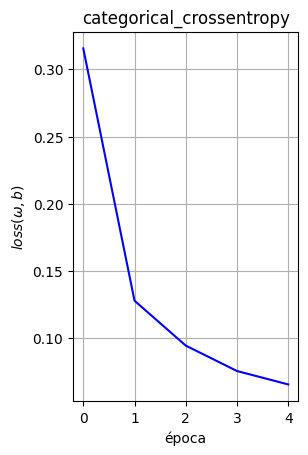

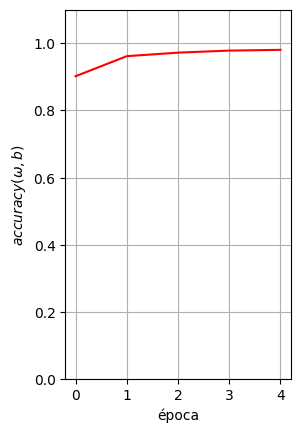

In [111]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['loss'], 'b',label='error')
plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$loss(\omega, b)$')
plt.grid(True)
#plt.legend(loc='upper right')
plt.show()

plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['accuracy'], 'r',label='precisión')
#plt.title(u'categorical_crossentropy')
plt.xlabel(u'época')
plt.ylabel(r'$accuracy(\omega, b)$')
plt.ylim([0,1.1])
plt.grid(True)
#plt.legend(loc='lower right')
plt.show()

In [117]:
# Guardamos nuestro modelo
model.export("numeros_CNN_savedmodel")
model.summary()

INFO:tensorflow:Assets written to: numeros_CNN_savedmodel/assets


INFO:tensorflow:Assets written to: numeros_CNN_savedmodel/assets


Saved artifact at 'numeros_CNN_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_55')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139991055806032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991055800576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991055794416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991067570624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991049311280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991067573968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991067572736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991067558832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991067560064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139991068581856: TensorSpec(shape=(), dtype=tf.resource, name=None)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 491,552 (1.88 MB)

 Trainable params: 163,850 (640.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 327,702 (1.25 MB)

In [113]:
# Creando una carpeta de salida
import os

if not os.path.exists("output"):
  !mkdir "output"

In [114]:
%pip install --upgrade tensorflowjs


Note: you may need to restart the kernel to use updated packages.


In [118]:
!tensorflowjs_converter --input_format=tf_saved_model ./numeros_CNN_savedmodel ./output/


2025-10-12 17:19:52.662101: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760303992.673675 2380122 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760303992.677179 2380122 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760303992.687599 2380122 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760303992.687624 2380122 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760303992.687628 2380122 computation_placer.cc:177] computation placer alr